In [1]:
import numpy
from bs4 import BeautifulSoup

In [2]:
from fastai.vision.all import *
import zipfile
from pathlib import Path
from shutil import copyfile

In [3]:
# Upload a new zipped batch
# Unzip it

# with zipfile.ZipFile('data/uploads/2020-08-29.zip', 'r') as zip_ref:
#     zip_ref.extractall('data/training_images/')

In [3]:
rugs = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'\d{5}-\d{4}_\d\d-(.+).jpe?g$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=336))
rugs

In [4]:
path = Path('../training_images')
dls = rugs.dataloaders(path,bs=8)
dls,len(path.ls())

(<fastai.data.core.DataLoaders at 0x7fea78068430>, 411)

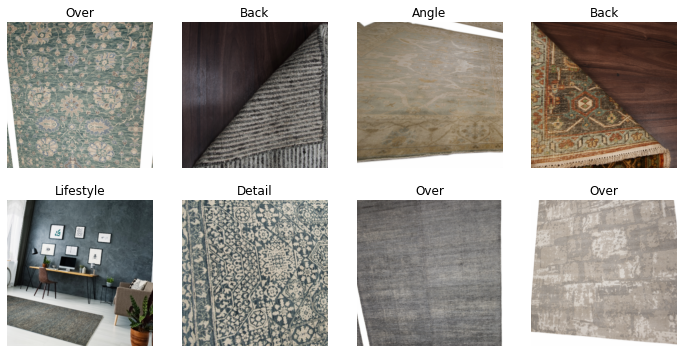

In [5]:
dls.show_batch(max_n=16)

In [6]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/robertcarter/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.035465,0.620742,0.234568,01:12


epoch,train_loss,valid_loss,error_rate,time
0,0.657073,0.162451,0.074074,01:41
1,0.428079,0.086870,0.037037,01:46
2,0.267408,0.015295,0.000000,01:45
3,0.194345,0.010892,0.000000,01:47


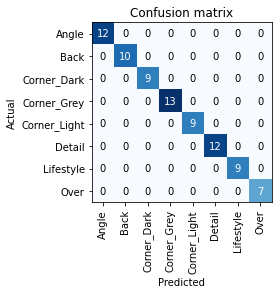

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


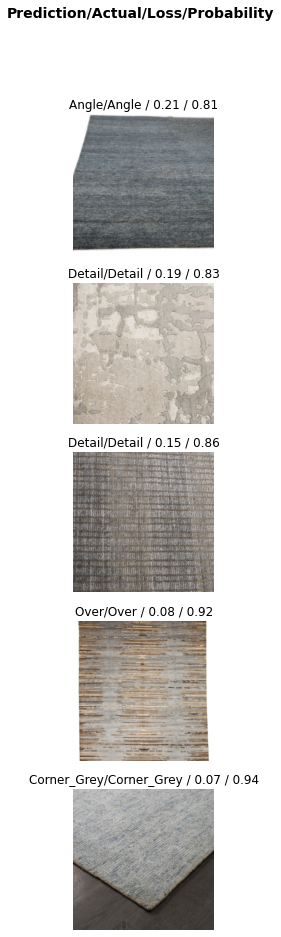

In [8]:
interp.plot_top_losses(5, nrows=5)

In [10]:
learn.export('../models/rug-classifier-model-jan-01-2021.pkl') 


In [11]:
root_path = Path()
models_path = Path('models/')
root_path.ls(file_exts='.pkl')

(#0) []

In [13]:
models_path

Path('models')

In [16]:
learner = load_learner('../models/rug-classifier-model-jan-01-2021.pkl')
learner

In [18]:
print(learner.dls.vocab)
learner,learner.predict('../test_images/07119-0003_02-Angle.tif') # insert test image here from unclassified group


['Angle', 'Back', 'Corner_Dark', 'Corner_Grey', 'Corner_Light', 'Detail', 'Lifestyle', 'Over']


(<fastai.learner.Learner at 0x7feab89fc100>,
 ('Angle',
  tensor(0),
  tensor([9.9994e-01, 4.9883e-07, 1.6850e-06, 6.1099e-08, 5.4093e-07, 4.2853e-07,
          5.0808e-05, 1.6390e-06])))